In [1]:
require(mgcv)
require(mgcViz)
require(lattice)
require(gridExtra)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-38. For overview type 'help("mgcv-package")'.

Loading required package: mgcViz

Warning message:
"package 'mgcViz' was built under R version 4.1.3"
Loading required package: qgam

Warning message:
"package 'qgam' was built under R version 4.1.3"
Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Registered S3 method overwritten by 'mgcViz':
  method from  
  +.gg   GGally


Attaching package: 'mgcViz'


The following objects are masked from 'package:stats':

    qqline, qqnorm, qqplot


Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:mgcViz':

    qq


Loading required package: gridExtra

Warning message:
"package 'gridExtra' was built under R version 4.1.3"


In [2]:
popt = function(w, h, d) { options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=d )}

In [3]:
load("../data/80.01_stat_obj.RData")

In [16]:
## The 'Distance' is mislabeled here, they are already transformed into similarities.
names(vi.1) = gsub("smLogDistRange", "smSimRange", names(vi.1))
names(vi.2) = gsub("dist_mtop5", "smSimTop5", names(vi.1))
names(vi.2) = gsub("log_dist_range", "smSimRange", names(vi.1))

dot.vi.err = dotplot(sort(vi.1), cex=1.2,        
            xlab=list("Var. Importance", cex=1),
            scales=list(
                x=list(cex=1, fontfamily="sans", tick.number=4),
                y=list(cex=0.9, fontfamily="sans")))

dot.vi.rt = dotplot(sort(vi.2), cex=1.2,        
            xlab=list("Var. Importance", cex=1),
            scales=list(
                x=list(cex=1, fontfamily="sans"),
                y=list(cex=0.9, fontfamily="sans")))

In [5]:
popt(8,8,100)
err.0.vis = getViz(err.0)
rtinv.0.vis = getViz(rtinv.0)
# gam.err.0.smDistRange = plot(err.0.vis, select=1, shade=T)

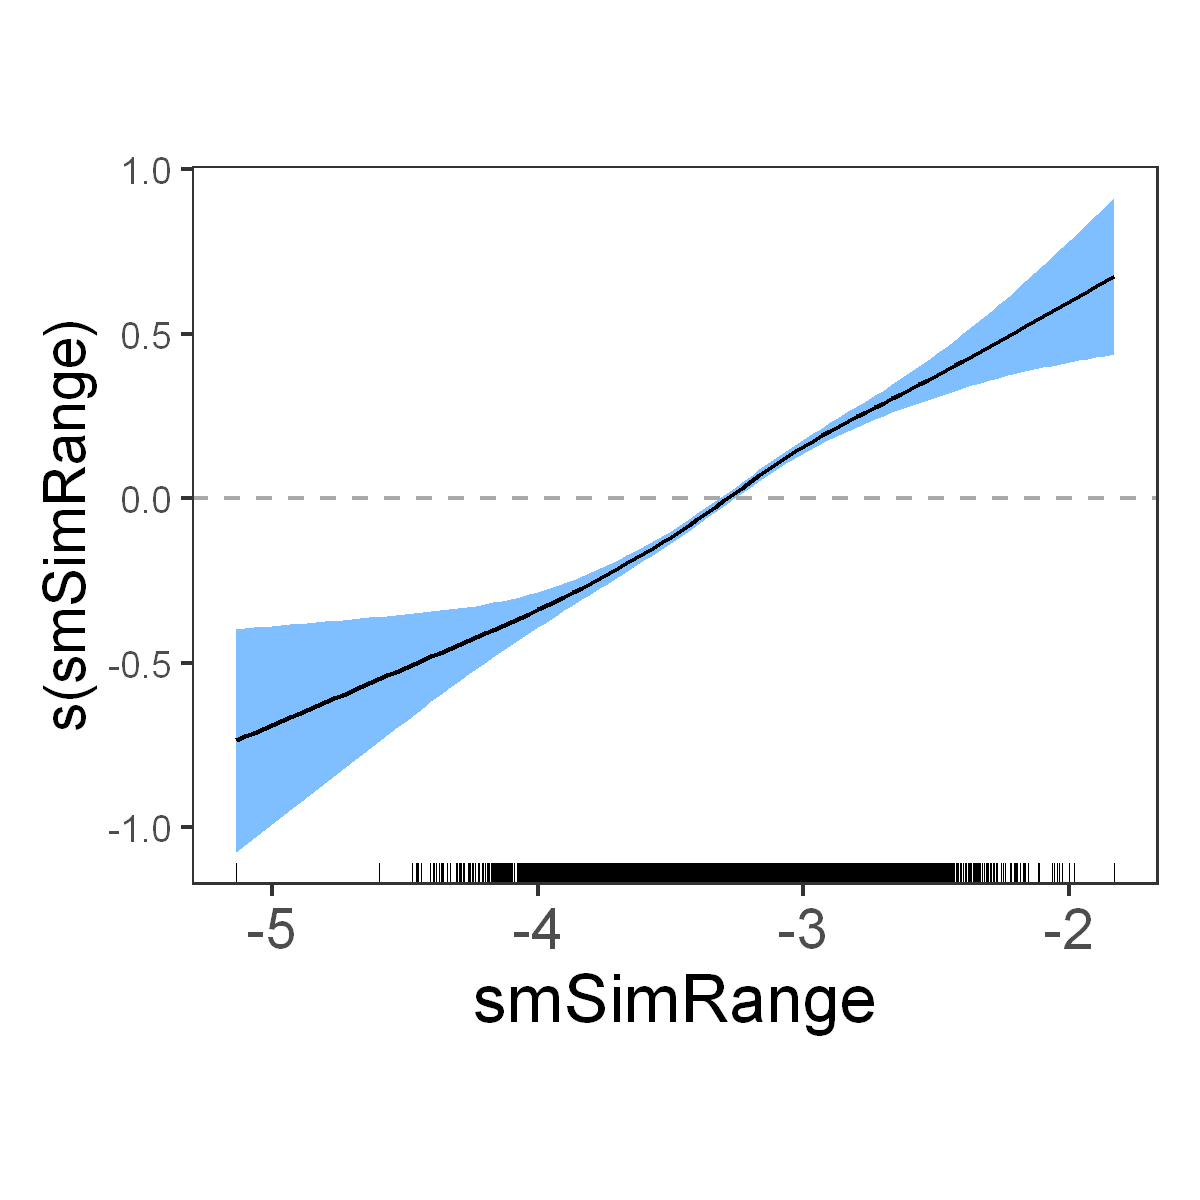

In [6]:
popt(4, 4, 300)
gtheme = theme(
            axis.title.x=element_text(size=16, family="sans"),
            axis.title.y=element_text(size=14, family="sans"),
            axis.text.x=element_text(size=14, family="sans"),
            # aspect.ratio=1,
            plot.margin = margin(40,10,40,10))

wrap_mgcviz = function(x, label_x, label_y){
    return (x + 
        xlab(label_x) + ylab(label_y) + 
        l_ciPoly(fill="#0080ff", alpha=.5)+l_fitLine()+l_rug() + 
        geom_hline(yintercept=0, linetype="dashed", col="darkgray") + 
        gtheme)
}

wrap_mgcviz(plot(sm(err.0.vis, 1)), "smSimRange", "s(smSimRange)")

In [7]:
err.0.distRange = wrap_mgcviz(plot(sm(err.0.vis, 1))+ylim(-1.1, 1.1), "smSimRange", "s(smSimRange)")
err.0.distmTop5 = wrap_mgcviz(plot(sm(err.0.vis, 2))+ylim(-1.1, 1.1), "smSimTop5", "s(smSimTop5)")
rtinv.0.distRange = wrap_mgcviz(plot(sm(rtinv.0.vis, 1))+ylim(-0.12, 0.08), "smSimRange", "s(smSimRange)")
rtinv.0.distmTop5 = wrap_mgcviz(plot(sm(rtinv.0.vis, 2))+ylim(-0.12, 0.08), "smSimTop5", "s(smSimTop5)")

In [17]:
popt(12,6,300)
require(grid)
require(gridExtra)
err.title = textGrob('Error Rate', y=-0.5, vjust=0, gp=gpar(fontsize=20, family="sans"))
rt.title = textGrob('Response Time', y=-1, gp=gpar(fontsize=20, family="sans"))
png("80.11-nw-paper-figure.png", width=12, height=6, units="in", res=300)
gridPrint(dot.vi.err, err.0.distRange, err.0.distmTop5,           
          dot.vi.rt, rtinv.0.distRange, rtinv.0.distmTop5, 
          err.title, rt.title,
          layout_matrix = matrix(c(7,7,7,1,2,3,8,8,8,4,5,6), nrow=4, byrow=T),
          widths=c(1,0.9,0.9), heights=c(0.1,1,0.01,1))
dev.off()

png 
  2

In [18]:
dev.off()

null device 
          1